In [1]:
# Add relevant Jupyter notebook extensions 

In [1]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['C:\\Users\\Z PL\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\Z PL\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\Z PL\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\Z PL\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\OxEngWork\\venv', '', 'c:\\OxEngWork\\venv\\Lib\\site-packages', 'c:\\OxEngWork\\venv\\Lib\\site-packages\\win32', 'c:\\OxEngWork\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\OxEngWork\\venv\\Lib\\site-packages\\Pythonwin']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

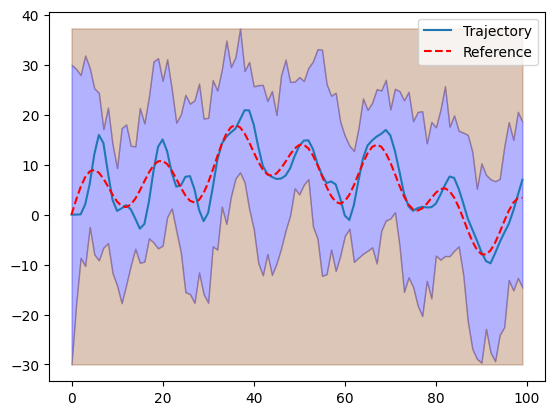

In [13]:
import os
import sys
import pandas as pd

# Add the project root to the system path
sys.path.append(os.path.abspath(".."))

from uuv_mission.control import PDController
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission

# Verify that the CSV file exists
csv_file_path = r"C:\OxEngWork\b1-coding-practical-mt24\data\mission.csv"
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"CSV file not found at {csv_file_path}")

sub = Submarine()
controller = PDController(kp=0.15, kd=0.7)
closed_loop = ClosedLoop(sub, controller)

mission = Mission.from_csv(csv_file_path)

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)